## 3.2.3 Adagrad

The Adagrad (Adaptive Gradient Algorithm) optimizer is an adaptive learning rate method designed to handle sparse data and problems where the learning rate needs to adjust dynamically. Adagrad adjusts the learning rate for each parameter based on the history of gradients, ensuring that frequently updated parameters receive smaller updates, while infrequent updates get larger steps. This adaptive adjustment helps in effectively optimizing models by scaling the learning rate inversely proportional to the square root of the accumulated gradients. The optimizer's ability to manage varying update scales makes it particularly useful for training models with sparse data, where some parameters might receive updates less frequently than others.

### Implementation

We will implement the Adagrad optimizer to minimize a simple quadratic function \( f(x) = (x - 3)^2 \). This function has a global minimum at \( x = 3 \), making it a straightforward test case for the optimization algorithm.


## Readings:

- [Visual Explanation of Gradient Descent Methods (Momentum, AdaGrad, RMSProp, Adam)](https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c)
- [Optimizers: SGD, RMSprop, Adam, Adagrad](https://readmedium.com/en/https:/ai.plainenglish.io/dl-tutorial-31-optimizers-sgd-rmsprop-adam-adagrad-f982b4010fbe) 
- [Adaptive Gradient Algorithm (ADAGRAD)](https://readmedium.com/en/https:/cdanielaam.medium.com/17-optimization-adaptive-gradient-algorithm-or-adagrad-4a16624e96b8)
- [What is RMSprop?](https://medium.com/thedeephub/what-is-rmsprop-0f54effc47e4)
- [Learning Parameters - AdaGrad, RMSProp, and Adam](https://towardsdatascience.com/learning-parameters-part-5-65a2f3583f7d)


### Adagrad Algorithm Explanation

The Adagrad (Adaptive Gradient Algorithm) optimizer is an adaptive learning rate method that adjusts the learning rate for each parameter based on the history of gradients. It is particularly effective for sparse data and problems where the learning rate needs to adjust dynamically.

### Adagrad Algorithm Steps

1. **Initialization**: Initialize the parameters and the sum of squares of past gradients (`G`).

2. **Gradient Calculation**: Compute the gradient of the objective function with respect to the parameters.

3. **Accumulated Gradient**: Update the sum of squares of past gradients:
   $$
   G_t = G_{t-1} + g_t^2
   $$

4. **Parameter Update**: Update the parameters using the following rule:
   $$
   \theta_t = \theta_{t-1} - \frac{\alpha}{\sqrt{G_t + \epsilon}} g_t
   $$
   - $\alpha$ is the learning rate.
   - $\epsilon$ is a small constant added to avoid division by zero (typically \( 1 \times 10^{-8} \)).
   - $\theta_t$ are the updated parameters at iteration \( t \).

By scaling the learning rate inversely proportional to the square root of the accumulated gradients, Adagrad ensures that frequently updated parameters receive smaller updates, while parameters that are infrequently updated get larger steps. This adaptive adjustment helps in effectively handling sparse data and optimizing models.


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Quadratic function
def f(x):
    return (x - 3)**2

# Gradient of the quadratic function
def grad_f(x):
    return 2 * (x - 3)

In [10]:
# Adagrad Optimizer parameters
learning_rate = 0.1
epsilon = 1e-8
n_iterations = 1000
x_init = 0.0

In [11]:
# Initialize parameters
x_adagrad = x_init
G = 0
adagrad_history = [x_adagrad]
costs = [f(x_adagrad)]

In [12]:
# Adagrad Optimization loop
for _ in range(n_iterations):
    g = grad_f(x_adagrad)
    
    # Update sum of squares of past gradients
    G += g**2
    
    # Update parameters
    x_adagrad = x_adagrad - learning_rate * g / (np.sqrt(G) + epsilon)
    adagrad_history.append(x_adagrad)
    costs.append(f(x_adagrad))

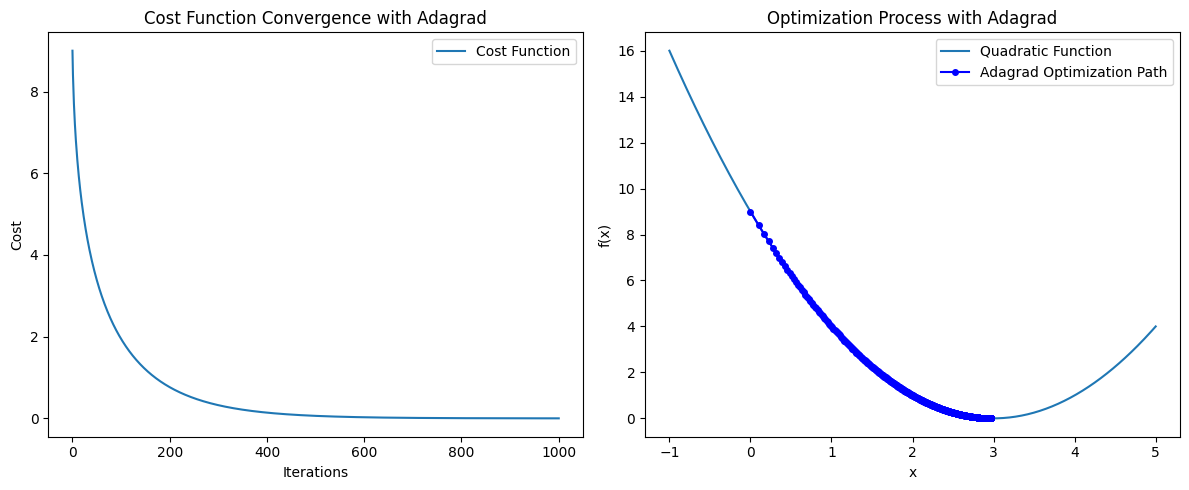

In [13]:
# Plotting the cost function
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(costs, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence with Adagrad')
plt.legend()

# Visualization of the optimization process
plt.subplot(1, 2, 2)
x_vals = np.linspace(-1, 5, 400)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label='Quadratic Function')
adagrad_history = np.array(adagrad_history)
plt.plot(adagrad_history, f(adagrad_history), 'bo-', label='Adagrad Optimization Path', markersize=4)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Optimization Process with Adagrad')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Output the final parameter
print(f"Parameters after {n_iterations} iterations: {x_adagrad}")

Parameters after 1000 iterations: 2.967760643581787


## Conclusion

The Adagrad optimizer is an effective method for handling sparse data and dynamically adjusting the learning rate for each parameter based on the history of gradients. By scaling the learning rate inversely proportional to the square root of the accumulated gradients, Adagrad ensures that frequently updated parameters receive smaller updates, while parameters that are infrequently updated get larger steps. The implementation demonstrates how Adagrad can effectively minimize a simple quadratic function, highlighting its practical utility in optimization problems.
